In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Mini_Project_1/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


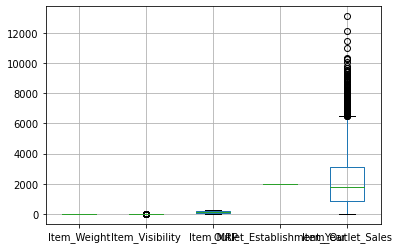

In [ ]:
numerics = ['int64','float64']

newdf = df.select_dtypes(include=numerics)

newdf.boxplot()

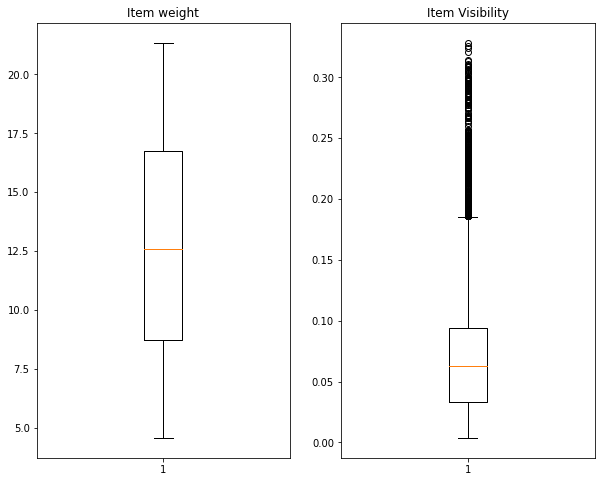

In [ ]:
from logging import PlaceHolder
fig, ax = plt.subplots(5,5,figsize=(10,8))

plt.subplot(121)
plt.boxplot(df.Item_Weight)
plt.title("Item weight")
plt.subplot(122)
plt.boxplot(df.Item_Visibility)
plt.title("Item Visibility")
plt.show()

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
df.fillna(value=df['Item_Outlet_Sales'].mean(),inplace = True)

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

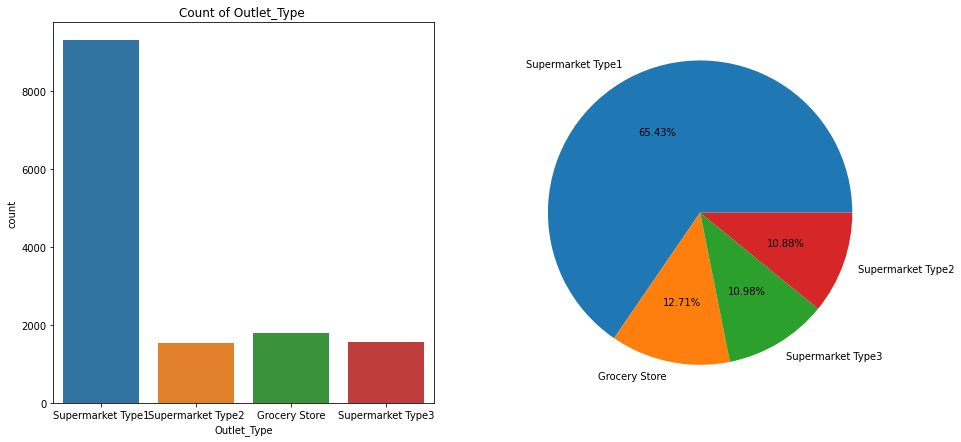

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet_Type ")                  
percentage = df["Outlet_Type"].value_counts()         
labels = list(df["Outlet_Type"].value_counts().index) 

sb.countplot(x = df["Outlet_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

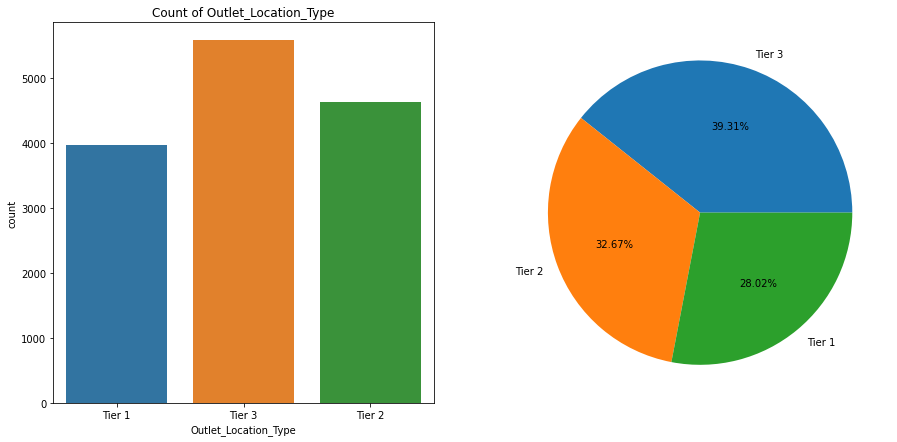

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet_Location_Type")                  
percentage = df["Outlet_Location_Type"].value_counts()         
labels = list(df["Outlet_Location_Type"].value_counts().index) 

sb.countplot(x = df["Outlet_Location_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

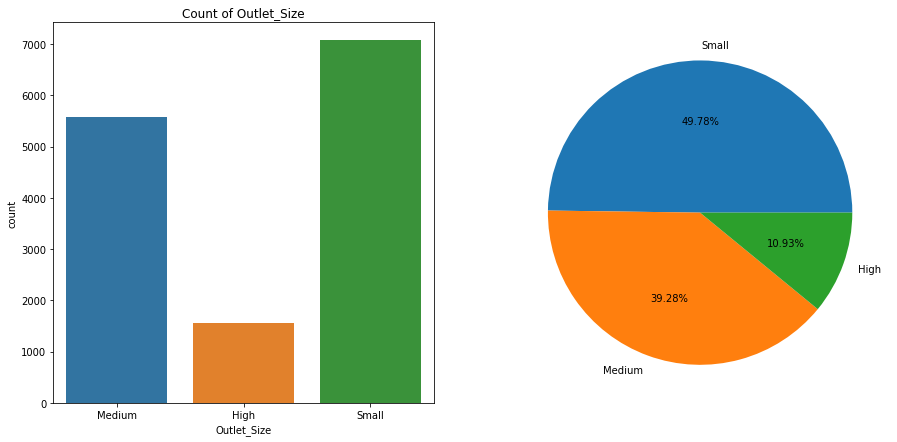

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet_Size")                  
percentage = df["Outlet_Size"].value_counts()         
labels = list(df["Outlet_Size"].value_counts().index) 

sb.countplot(x = df["Outlet_Size"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

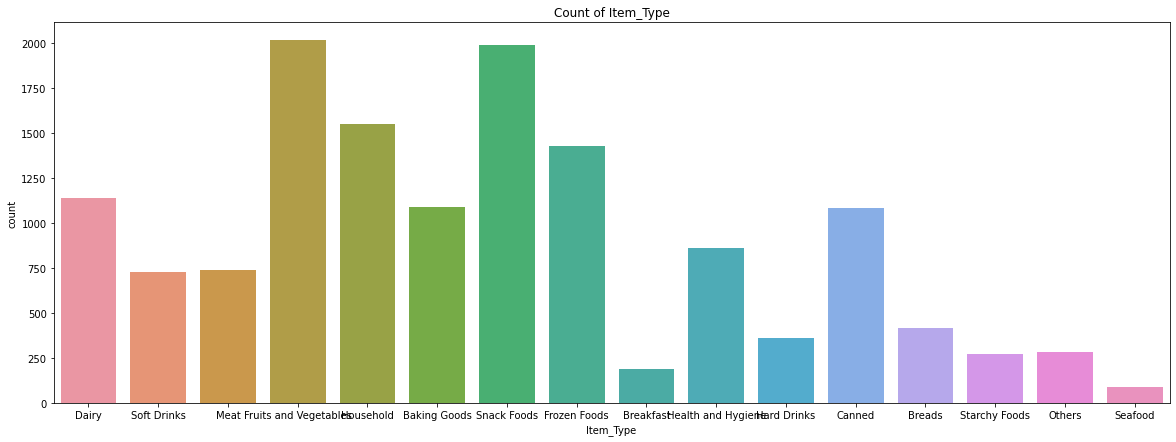

In [ ]:
plt.figure(figsize = (20, 7))                                          
plt.title("Count of Item_Type")                  



sb.countplot(x = df["Item_Type"])

plt.show()

In [ ]:
del df["Item_Identifier"]

In [ ]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
from numpy.random import default_rng
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap 
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
encoder = preprocessing.LabelEncoder()
object = []
for i in df.select_dtypes('object').columns:
  object.append(i)

for i in object:
  df[i] = df[i].astype('category')

In [ ]:
encoder = preprocessing.LabelEncoder()
category = []
for i in df.select_dtypes('category').columns:
  category.append(i)

for i in category:
  df[i] = encoder.fit_transform(df[i])

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64','float64']
  new_df = df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return df_scaled

In [ ]:
scale = 'minmax' 
df_scaled=feature_scale(scale)
df_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.164551
14200,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.164551
14201,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.164551
14202,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.164551


In [ ]:
corr_df = df_scaled.corr()
corr_df.style.background_gradient(cmap="BuGn")

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.010259
Item_Fat_Content,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.014494
Item_Visibility,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.105064
Item_Type,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.013194
Item_MRP,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.440979
Outlet_Identifier,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.038061
Outlet_Size,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.046879
Outlet_Location_Type,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.069224
Outlet_Type,0.001913,-0.000228,-0.172744,0.004305,0.000136,0.099899,-0.122519,-0.260496,0.467251,1.000000,0.310989


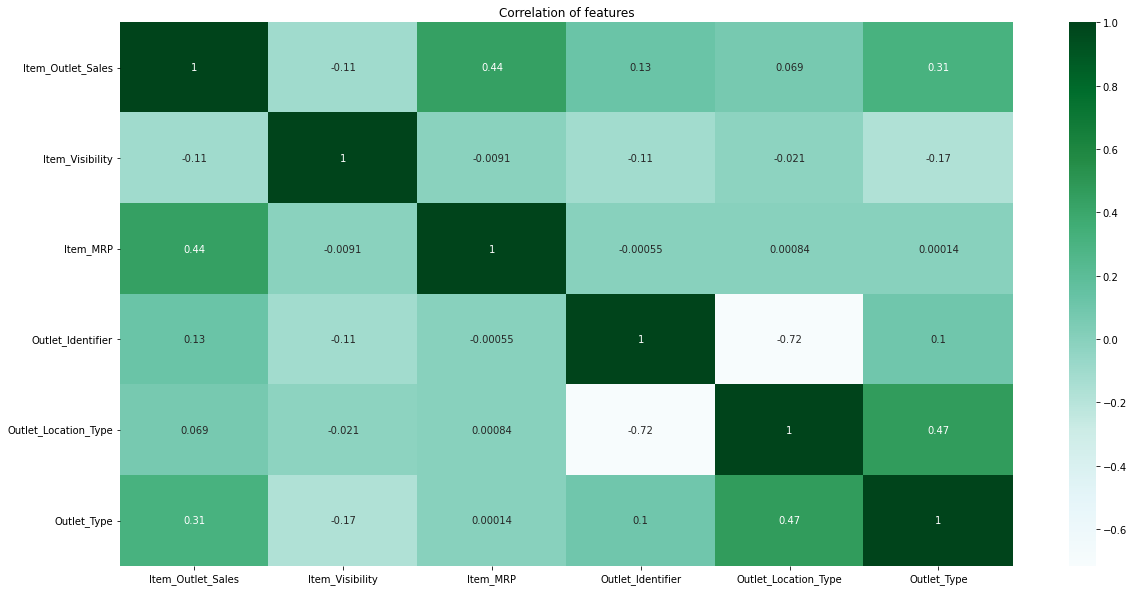

In [ ]:
new_df = df_scaled[["Item_Outlet_Sales","Item_Visibility","Item_MRP","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"]]
plt.subplots(figsize=(20,10))
corr_1 = sb.heatmap(new_df.corr(),cmap="BuGn",annot = True)
plt.title("Correlation of features")
plt.show()

In [ ]:
y = new_df["Item_Outlet_Sales"]
x = new_df
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
print("The size of new test dataframes is",(X_train.shape, X_test.shape))

The size of new test dataframes is ((9942, 6), (4262, 6))


<function matplotlib.pyplot.show>

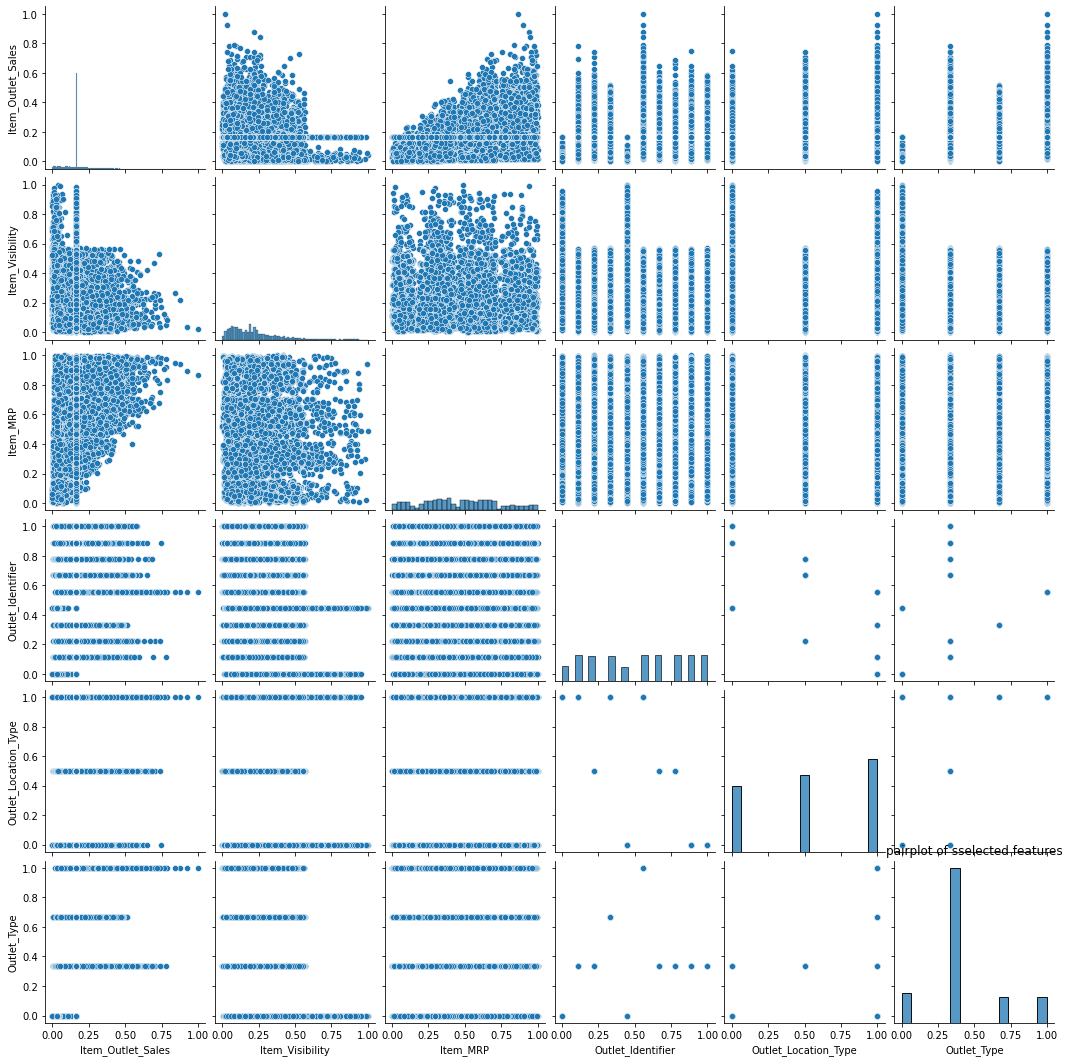

In [ ]:
sb.pairplot(new_df)
plt.title("pairplot of sselected features")
plt.show

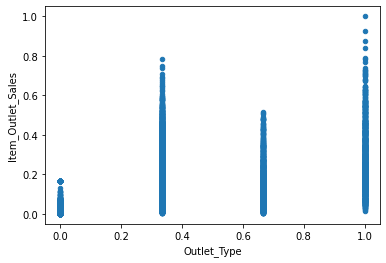

In [ ]:
model = new_df.plot.scatter(x="Outlet_Type", y="Item_Outlet_Sales", s=20)     #max corr value 0.87
model.set(xlabel = "Outlet_Type", ylabel = "Item_Outlet_Sales")
plt.show()

In [ ]:
x = np.array(new_df["Outlet_Type"]).reshape(-1,1)
y = np.array(new_df["Item_Outlet_Sales"]).reshape(-1,1)
X_train,X_test ,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 20)

In [ ]:
s_model = LinearRegression().fit(X_train, y_train)
s_r_sq=s_model.score(X_train, y_train)

In [ ]:
print('coefficient of determination:', s_r_sq)
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

coefficient of determination: 0.09959403079169171
intercept: [0.11663661]
slope: [[0.11996939]]


In [ ]:
y_pred = s_model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[0.15662641]
 [0.15662641]
 [0.15662641]
 ...
 [0.15662641]
 [0.15662641]
 [0.1966162 ]]


## Y = 0.1199X + 0.1166

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(MSE, MAE, RMSE)

0.009432574036938566 0.0665577957160745 0.09712143963584233


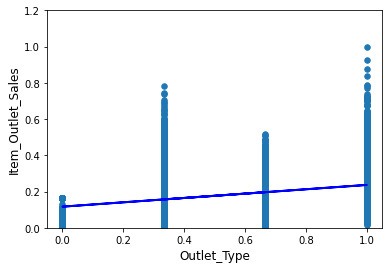

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
plt.ylim((0,1.2))


new_df.plot.scatter(x = 'Outlet_Type', y = 'Item_Outlet_Sales', s = 30, ax=ax)
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.show()

## Logistic Regression


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
sb.set(style="white") #white background style for seaborn plots
sb.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
encoder = preprocessing.LabelEncoder()
object = []
for i in df.select_dtypes('object').columns:
  object.append(i)

for i in object:
  df[i] = df[i].astype('category')

In [ ]:
encoder = preprocessing.LabelEncoder()
category = []
for i in df.select_dtypes('category').columns:
  category.append(i)

for i in category:
  df[i] = encoder.fit_transform(df[i])

In [ ]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df = df.astype({"Item_Weight":'int', "Item_Visibility":'int', "Item_MRP":'int', "Item_Outlet_Sales":'int'})

In [ ]:
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64','float64']
  new_df = df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return df_scaled

In [ ]:
scale = 'minmax' 
df_scaled=feature_scale(scale)
df_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.294118,0.0,0.0,0.266667,0.927660,1.000000,0.583333,0.5,0.0,0.333333,0.283613
1,0.058824,1.0,0.0,0.933333,0.072340,0.333333,1.000000,0.5,1.0,0.666667,0.031410
2,0.764706,0.0,0.0,0.666667,0.468085,1.000000,0.583333,0.5,0.0,0.333333,0.158125
3,0.882353,1.0,0.0,0.400000,0.642553,0.000000,0.541667,0.5,1.0,0.000000,0.053551
4,0.235294,0.0,0.0,0.600000,0.093617,0.111111,0.083333,0.0,1.0,0.333333,0.073623
...,...,...,...,...,...,...,...,...,...,...,...
14199,0.352941,1.0,0.0,0.866667,0.468085,0.888889,0.500000,1.0,0.0,0.333333,0.164560
14200,0.176471,1.0,0.0,1.000000,0.587234,0.333333,1.000000,0.5,1.0,0.666667,0.164560
14201,0.352941,0.0,0.0,0.533333,0.370213,0.777778,0.708333,1.0,0.5,0.333333,0.164560
14202,0.647059,1.0,0.0,0.200000,0.778723,0.222222,0.916667,1.0,0.5,0.333333,0.164560


In [ ]:
df.shape

(14204, 11)

In [ ]:
train_num=int(14204*0.8)
new_df_train = df.iloc[:train_num,:]
new_df_test = df.iloc[(train_num+1):,:]
print("Shape of new dataframes - {} , {}".format(new_df_train.shape, new_df_test.shape))

Shape of new dataframes - (11363, 11) , (2840, 11)


In [ ]:
X_train = new_df_train.drop(columns='Item_Fat_Content', axis =1)
Y_train = new_df_train['Item_Fat_Content']
X_test = new_df_test.drop(columns='Item_Fat_Content', axis =1)
Y_test = new_df_test['Item_Fat_Content']
X_train.shape, Y_train.shape, X_test.shape

((11363, 10), (11363,), (2840, 10))

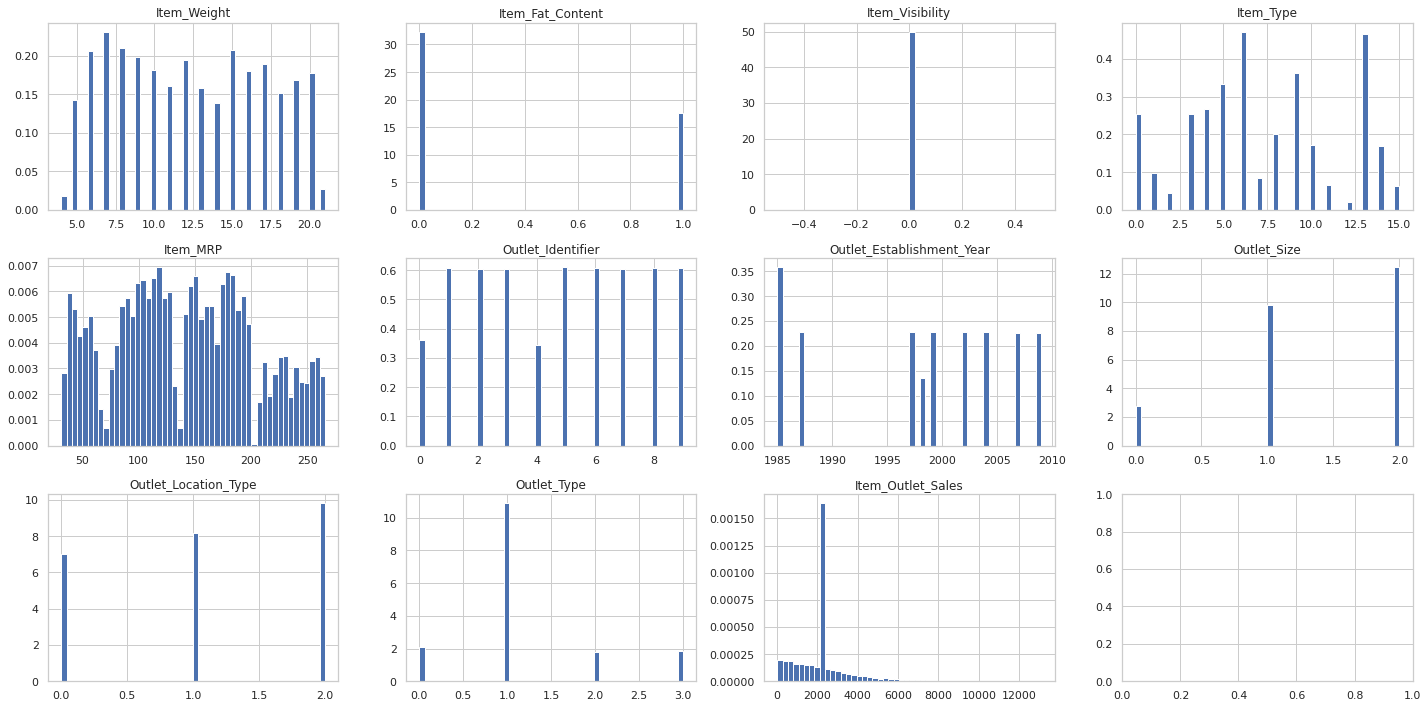

In [ ]:

new_income_df = df.select_dtypes(include=numerics)
numeric_cols=new_income_df.columns
num_cols=4
n_bins = 50

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_income_df[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = logreg.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[1818    0]
 [1022    0]]
1818 0 1022 0


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred))
print('f1-score:', f1_score(Y_test, Y_pred))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.6401408450704226
recall: 0.0
f1-score: 0.0
precision: 0.0


In [ ]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
print('ROC: %.3f' % roc)

ROC: 0.622


In [ ]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.500


In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
ns_probs = [0 for _ in range(len(Y_test))]

In [ ]:
lr_probs = logreg.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.622


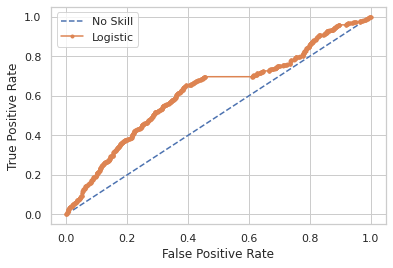

In [ ]:
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

We can say from graph that this model is not good enough